<h1>Auctionet & Bids Project</h1>

<p>This project is about analysing two datasets from Auctionet. One dataset deals with auctions, and the other with all information about the bids on the auction items</p>

<h2>Insight: Highest automated bid</h2>

<p>The highest valued automatic bid was done on the 4th of May, 2022
it was set up by the 7th bidder on the item, and went up all the way to a fantastic value of 1,213,168 SEK

unfortunately, our automatic bidder was outbid still by the 6th bidder. And that was the last bid.

the item in question is indeed a fascinating find https://auctionet.com/sv/2127361-shamshir-persisk-omkring-1800</p>

<h2>Insight: Item condition is set by the user</h2>

<p>As the value for condition is highly variable, it seems to be put in by the user and not standardised</p>

<h2>Insight: 'Weapons' is the most valuable category </h2>

'Weapons' is the category with the highest average estiamted value by a large margin

<h3>Argument</h3>

The code below shows the top 5 categories by average estimated value of their items

<Axes: xlabel='main_category'>

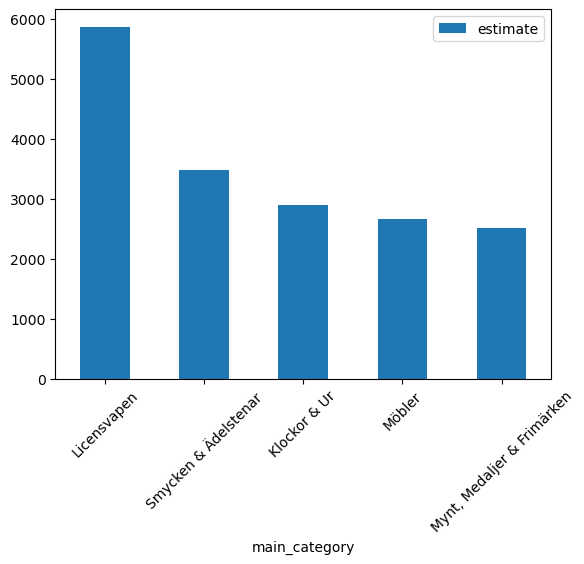

In [175]:
highest_estimate_means.plot(kind = "bar", rot=45)

<h1>Exploration</h1>

<p>Points of interest:</p>

* highest-estimated items
* categories with the highest average bids
* highest bid item per category
* lowest bid category

In [55]:
import pandas as pd

<h2>Data Loading & Preprocessing</h2>

Loading the auctions data and taking a look

In [56]:
auctions = pd.read_csv('auctions.csv')

In [57]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576985 entries, 0 to 576984
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   url                                     576957 non-null  object 
 1   id                                      559683 non-null  float64
 2   auction_id                              559683 non-null  float64
 3   currency                                559683 non-null  object 
 4   reserve_met                             559683 non-null  object 
 5   estimate                                559683 non-null  float64
 6   upper_estimate                          585 non-null     float64
 7   next_bid_amount                         559683 non-null  float64
 8   state                                   559683 non-null  object 
 9   hammered                                559683 non-null  object 
 10  processed                               5596

In [58]:
# .describe() is not useful for this data

In [59]:
auctions.describe()

,id,auction_id,estimate,upper_estimate,next_bid_amount,ends_at,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,calendar_days_left,number_of_visits,catalog_nr
count,5.596830e+05,5.596830e+05,559683.000000,585.000000,5.596830e+05,5.596830e+05,0.0,0.0,559683.0,576954.000000,4060.000000
mean,2.861635e+06,5.105017e+06,2303.821231,22354.078632,2.333955e+03,1.678281e+09,NaN,NaN,0.0,338.831917,440.923153
std,9.148054e+05,1.647371e+06,5168.653171,44573.523686,6.486609e+03,6.556115e+07,NaN,NaN,0.0,213.317621,268.629556
min,1.004700e+04,4.800000e+01,200.000000,2898.000000,2.500000e+02,1.323171e+09,NaN,NaN,0.0,1.000000,1.000000
25%,2.452644e+06,4.363338e+06,600.000000,6955.000000,4.500000e+02,1.667322e+09,NaN,NaN,0.0,196.000000,207.000000
50%,3.176876e+06,5.678180e+06,1000.000000,11591.000000,9.000000e+02,1.702403e+09,NaN,NaN,0.0,301.000000,431.000000
75%,3.556836e+06,6.358460e+06,2000.000000,20863.000000,2.400000e+03,1.718888e+09,NaN,NaN,0.0,451.000000,666.000000
max,3.877901e+06,6.911299e+06,817391.000000,695418.000000,1.288163e+06,1.731275e+09,NaN,NaN,0.0,999.000000,991.000000


In [60]:
pd.set_option("display.max_columns", None)

auctions.sample(3)

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
543058,https://auctionet.com/sv/2896826-elsa-stackelb...,2896826.0,5125746.0,SEK,True,4000.0,NaN,3400.0,sold,False,True,True,1.687280e+09,20 jun 2023 kl. 18:51 CEST,tis 20 jun,tis 20 jun kl. 18:51 CEST,False,True,False,NaN,NaN,NaN,0.0,"2896826. ELSA STACKELBERG. fåtöljer, ett par, ...",Sitthöjd 42 cm.,"Torrsprickor, fläckar på dynornas klädsel, bru...",Stockholms Auktionsverk Magasin 5,460.0,Möbler,Trädgårdsmöbler,NaN,NaN,NaN,NaN
378511,https://auctionet.com/sv/3209482-en-fransk-tru...,3209482.0,5808120.0,SEK,True,1118.0,NaN,769.0,sold,False,True,True,1.705070e+09,12 jan 2024 kl. 15:35 CET,fre 12 jan,fre 12 jan kl. 15:35 CET,False,True,False,NaN,NaN,NaN,0.0,3209482. EN FRANSK TRUMEAU SPEGEL I LOUIS XVI-...,I slutet av 1800-talet/början av 1900-talet hä...,Krympningsdelningar och små förluster.Spegelpl...,Lawrences Auctioneers,313.0,NaN,NaN,NaN,NaN,NaN,NaN
42845,https://auctionet.com/sv/3607018-vaggbonad-duk...,3607018.0,6417111.0,SEK,True,500.0,NaN,411.0,sold,False,True,True,1.727985e+09,3 okt 2024 kl. 21:43 CEST,tor 3 okt,tor 3 okt kl. 21:43 CEST,False,True,False,NaN,NaN,NaN,0.0,"3607018. VÄGGBONAD, DUK och KUDDÖVERDAG, 3 del...","Bonad, ca 170 x 72 cm.Kuddöverdrag, ca 56 x 43...",Bruksslitage.,Stadsauktion Sundsvall,132.0,Mattor & Textil,Textil,NaN,NaN,NaN,NaN


<h2>Exploratory Data Analysis (EDA) in Auctions</h2>

<h3>Looking at currency field</h3>

In [61]:
# the only currency is SEK

In [62]:
auctions["currency"].unique()

array(['SEK', nan], dtype=object)

In [63]:
no_currency = auctions[auctions["currency"] != "SEK"]

In [64]:
type(no_currency)

pandas.core.frame.DataFrame

In [65]:
no_currency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17302 entries, 35 to 576968
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   url                                     17274 non-null  object 
 1   id                                      0 non-null      float64
 2   auction_id                              0 non-null      float64
 3   currency                                0 non-null      object 
 4   reserve_met                             0 non-null      object 
 5   estimate                                0 non-null      float64
 6   upper_estimate                          0 non-null      float64
 7   next_bid_amount                         0 non-null      float64
 8   state                                   0 non-null      object 
 9   hammered                                0 non-null      object 
 10  processed                               0 non-null      objec

In [66]:
# thats interesting. let's see what's up with these items that have no currency

In [67]:
no_currency["error"].unique()

array(['Hittade inte post.', nan], dtype=object)

In [68]:
# so one kind doesn't exist / is not posted - and the other is null

In [69]:
no_currency[no_currency["error"] != "Hittade inte post."]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
7528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# so these ones are just completely empty of any data
# then we can remove this from the no currency dataframe

In [71]:
nan_mask = no_currency["error"] == "Hittade inte post."

In [72]:
no_currency = no_currency[nan_mask]

In [73]:
no_currency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17274 entries, 35 to 576968
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   url                                     17274 non-null  object 
 1   id                                      0 non-null      float64
 2   auction_id                              0 non-null      float64
 3   currency                                0 non-null      object 
 4   reserve_met                             0 non-null      object 
 5   estimate                                0 non-null      float64
 6   upper_estimate                          0 non-null      float64
 7   next_bid_amount                         0 non-null      float64
 8   state                                   0 non-null      object 
 9   hammered                                0 non-null      object 
 10  processed                               0 non-null      objec

In [74]:
# lets do the same to the original dataframe

nan_mask = auctions["error"].isna()

In [75]:
auctions[nan_mask]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
0,https://auctionet.com/sv/3412895-stringhylla-f...,3412895.0,6064215.0,SEK,True,400.0,NaN,1001.0,sold,False,True,True,1.713972e+09,24 apr 2024 kl. 17:15 CEST,ons 24 apr,ons 24 apr kl. 17:15 CEST,False,True,False,NaN,NaN,NaN,0.0,"3412895. STRINGHYLLA, FEM DELAR.","Tre hyllplan, längd 80cm, bredd 21cm.Två gavlar.","Bruks- och ytslitage, repor.",Björnssons Auktionskammare,427.0,Möbler,Skåp & Hyllor,NaN,NaN,NaN,NaN
1,https://auctionet.com/sv/2431371-moissanite-ca...,2431371.0,4344683.0,SEK,True,1000.0,NaN,450.0,sold,False,True,True,1.665938e+09,16 okt 2022 kl. 18:41 CEST,sön 16 okt,sön 16 okt kl. 18:41 CEST,False,True,False,NaN,NaN,NaN,0.0,"2431371. MOISSANITE, ca 3 ct.",Rektangulär trappslipad vit moissanite.GLI-cer...,Se certifikat.,Ekenbergs,284.0,Smycken & Ädelstenar,Ädelstenar,NaN,NaN,NaN,NaN
2,https://auctionet.com/sv/2949567-pistol-halvau...,2949567.0,5519009.0,SEK,True,4000.0,NaN,6100.0,sold,False,True,True,1.698571e+09,29 okt 2023 kl. 10:24 CET,sön 29 okt,sön 29 okt kl. 10:24 CET,True,True,False,NaN,NaN,NaN,0.0,"18.2949567. PISTOL, Halvautomatisk, fabrikat R...","Patronantal 10, piparrangemang EP, piplängd 14...",MYCKET GOTT SKICK.,Walter Borg,1.0,Licensvapen,Pistoler,18.0,NaN,NaN,NaN
3,https://auctionet.com/sv/2835116-bordsur-samt-...,2835116.0,5006279.0,SEK,True,6000.0,NaN,7519.0,sold,False,True,True,1.684614e+09,20 maj 2023 kl. 22:24 CEST,lör 20 maj,lör 20 maj kl. 22:24 CEST,False,True,False,NaN,NaN,NaN,0.0,"2835116. BORDSUR samt CASOLETTER, 1 par, Brons...","Urets längd 48 cm, höjd 40 cmCasoletternas höj...",Bruksslitage. Fungerade vid katalogiseringstil...,Varberg Auktionskammare,388.0,Klockor & Ur,Bordsur,NaN,NaN,NaN,NaN
4,https://auctionet.com/sv/2359720-remington-12-...,2359720.0,4155330.0,SEK,True,2000.0,NaN,1700.0,sold,False,True,True,1.661960e+09,31 aug 2022 kl. 17:38 CEST,ons 31 aug,ons 31 aug kl. 17:38 CEST,True,True,False,NaN,NaN,NaN,0.0,"2359720. Remington 12,7x44R #839.",Karbin Svensk enkelskott. Fabrikat HVA mod kar...,Slitet vapen i mindre gott skick.,Mauritz Widforss,885.0,Licensvapen,Kulgevär,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576980,https://auctionet.com/sv/3372957-harald-notini...,3372957.0,6036480.0,SEK,True,1200.0,NaN,550.0,sold,False,True,True,1.710796e+09,18 mar 2024 kl. 22:08 CET,mån 18 mar,mån 18 mar kl. 22:08 CET,False,True,False,NaN,NaN,NaN,0.0,"3372957. HARALD NOTINI. Karaff, frostat glas, ...",Etikettmärkt. Höjd 16 cm.,Bruksslitage.,Stadsauktion Sundsvall,241.0,Glas,Bruksglas,NaN,NaN,NaN,NaN
576981,https://auctionet.com/sv/3829795-kannor-2-st-e...,3829795.0,6818526.0,SEK,True,1000.0,NaN,650.0,sold,False,True,True,1.730991e+09,7 nov 2024 kl. 15:49 CET,tor 7 nov,tor 7 nov kl. 15:49 CET,False,True,False,NaN,NaN,Stockholm,0.0,"3829795. KANNOR, 2 st, eventuellt Erika Lagerb...",Höjd 22cm vardera,Inga anmärkningar.,Crafoord Auktioner Stockholm,94.0,Glas,Bruksglas,NaN,Galoppvägen 3183 64 TäbySverige,Monter 7,NaN
576982,https://auctionet.com/sv/2970534-hillebard-18-...,2970534.0,5280838.0,SEK,True,1000.0,NaN,550.0,sold,False,True,True,1.692192e+09,16 aug 2023 kl. 15:14 CEST,ons 16 aug,ons 16 aug kl. 15:14 CEST,False,True,False,NaN,NaN,NaN,0.0,"2970534. HILLEBARD, 18/1900-tal.",Tot. längd 229 cm.,"Slitage, rost. Trästav med spikhål.",Crafoord Auktioner Stockholm,317.0,Vapen & Militaria,Blankvapen,NaN,NaN,NaN,NaN
576983,https://auctionet.com/sv/2951054-fat-massing-f...,2951054.0,5367219.0,SEK,True,1500.0,NaN,350.0,sold,False,True,True,1.6

In [76]:
# this is a bit more difficult. 
# let's see if the recommendation from Copilot could work (using .drop() and the index from the sub-dataframe)

In [77]:
no_currency.iloc[7528]

url                                       https://auctionet.com/sv/events/699-autumn-fin...
id                                                                                      NaN
auction_id                                                                              NaN
currency                                                                                NaN
reserve_met                                                                             NaN
estimate                                                                                NaN
upper_estimate                                                                          NaN
next_bid_amount                                                                         NaN
state                                                                                   NaN
hammered                                                                                NaN
processed                                                                       

In [78]:
auctions.iloc[7528]

url                                       NaN
id                                        NaN
auction_id                                NaN
currency                                  NaN
reserve_met                               NaN
estimate                                  NaN
upper_estimate                            NaN
next_bid_amount                           NaN
state                                     NaN
hammered                                  NaN
processed                                 NaN
publicly_visible                          NaN
ends_at                                   NaN
ends_at_string                            NaN
ends_at_string_short                      NaN
ends_at_string_short_with_time            NaN
license_weapon                            NaN
online_auction                            NaN
hammer_auction                            NaN
live_bidding_event_starts_at              NaN
live_bidding_event_approximate_ends_at    NaN
location                          

In [79]:
# seems to match. let's now do the operation then

In [80]:
no_currency = auctions[auctions["currency"] != "SEK"]

to_Delete = no_currency[no_currency["error"] != "Hittade inte post."]

In [81]:
to_Delete

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
7528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
auctions_no_error = auctions.drop(to_Delete.index)

In [83]:
auctions_no_error.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576957 entries, 0 to 576984
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   url                                     576957 non-null  object 
 1   id                                      559683 non-null  float64
 2   auction_id                              559683 non-null  float64
 3   currency                                559683 non-null  object 
 4   reserve_met                             559683 non-null  object 
 5   estimate                                559683 non-null  float64
 6   upper_estimate                          585 non-null     float64
 7   next_bid_amount                         559683 non-null  float64
 8   state                                   559683 non-null  object 
 9   hammered                                559683 non-null  object 
 10  processed                               559683 no

In [84]:
auctions_no_error.iloc[7528]

url                                       https://auctionet.com/sv/3203664-medaljer-mark...
id                                                                                3203664.0
auction_id                                                                        5731730.0
currency                                                                                SEK
reserve_met                                                                            True
estimate                                                                              500.0
upper_estimate                                                                          NaN
next_bid_amount                                                                       350.0
state                                                                                  sold
hammered                                                                              False
processed                                                                       

In [85]:
# seems we've removed the nan's from error

<h3>Summary</h3>

it seems there's a pattern with these auction items that are missing currency value. they also miss the same number of other columns so I assume that filling these columns is not mandatory for listings. auctions_no_error is the datafram containing no errors which I will use for the rest of this exploration

<h3>Looking at license weapon</h3>

In [86]:
auctions_no_error["license_weapon"].unique()

array([False, True, nan], dtype=object)

In [87]:
auctions_no_error[auctions_no_error["license_weapon"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17274 entries, 35 to 576968
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   url                                     17274 non-null  object 
 1   id                                      0 non-null      float64
 2   auction_id                              0 non-null      float64
 3   currency                                0 non-null      object 
 4   reserve_met                             0 non-null      object 
 5   estimate                                0 non-null      float64
 6   upper_estimate                          0 non-null      float64
 7   next_bid_amount                         0 non-null      float64
 8   state                                   0 non-null      object 
 9   hammered                                0 non-null      object 
 10  processed                               0 non-null      objec

In [88]:
# it seems there's a pattern with these auction items that are missing currency. they also miss the same number of other columns
# so I assume that filling these columns is not mandatory for listings. insight

In [89]:
weapon_mask = auctions_no_error["license_weapon"] == True

In [90]:
auctions_no_error[weapon_mask]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
2,https://auctionet.com/sv/2949567-pistol-halvau...,2949567.0,5519009.0,SEK,True,4000.0,NaN,6100.0,sold,False,True,True,1.698571e+09,29 okt 2023 kl. 10:24 CET,sön 29 okt,sön 29 okt kl. 10:24 CET,True,True,False,NaN,NaN,NaN,0.0,"18.2949567. PISTOL, Halvautomatisk, fabrikat R...","Patronantal 10, piparrangemang EP, piplängd 14...",MYCKET GOTT SKICK.,Walter Borg,1.0,Licensvapen,Pistoler,18.0,NaN,NaN,NaN
4,https://auctionet.com/sv/2359720-remington-12-...,2359720.0,4155330.0,SEK,True,2000.0,NaN,1700.0,sold,False,True,True,1.661960e+09,31 aug 2022 kl. 17:38 CEST,ons 31 aug,ons 31 aug kl. 17:38 CEST,True,True,False,NaN,NaN,NaN,0.0,"2359720. Remington 12,7x44R #839.",Karbin Svensk enkelskott. Fabrikat HVA mod kar...,Slitet vapen i mindre gott skick.,Mauritz Widforss,885.0,Licensvapen,Kulgevär,NaN,NaN,NaN,NaN
14,https://auctionet.com/sv/3228491-hdf-titan-kal...,3228491.0,5736601.0,SEK,True,4000.0,NaN,2700.0,sold,False,True,True,1.705509e+09,17 jan 2024 kl. 17:34 CET,ons 17 jan,ons 17 jan kl. 17:34 CET,True,True,False,NaN,NaN,NaN,0.0,3228491. HDF Titan kal. 308 win #860928 SE1146...,Studsare Tysk Repeter Fabrikat Voere. Model HD...,Bruksslitage.,Mauritz Widforss,501.0,Licensvapen,Kulgevär,NaN,NaN,NaN,NaN
83,https://auctionet.com/sv/1265288-colt-lawman-m...,1265288.0,2289713.0,SEK,True,3000.0,NaN,1200.0,sold,False,True,True,1.581931e+09,17 feb 2020 kl. 10:15 CET,mån 17 feb,mån 17 feb kl. 10:15 CET,True,True,False,NaN,NaN,NaN,0.0,1265288. COLT. LAWMAN MK.V .357 mag.,Tillverkningsnummer: 21748 VPiplängd: 10 cm,Nyskick.,Mauritz Widforss,4.0,Licensvapen,Revolvrar,NaN,NaN,NaN,NaN
131,https://auctionet.com/sv/2156231-pistol-halvau...,2156231.0,3890519.0,SEK,True,7000.0,NaN,11020.0,sold,False,True,True,1.652692e+09,16 maj 2022 kl. 11:12 CEST,mån 16 maj,mån 16 maj kl. 11:12 CEST,True,True,False,NaN,NaN,NaN,0.0,"131.2156231. PISTOL, Halvautomatisk, fabrikat ...","Patronantal 7, piparrangemang EP, piplängd 13 ...","Märken på blåneringen, små fläckar i pipan, ro...",Walter Borg,1.0,Licensvapen,Pistoler,131.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576745,https://auctionet.com/sv/1581083-366-kulgevar-...,1581083.0,2972786.0,SEK,True,3000.0,NaN,1726.0,sold,False,True,True,1.620652e+09,10 maj 2021 kl. 15:05 CEST,mån 10 maj,mån 10 maj kl. 15:05 CEST,True,True,False,NaN,NaN,NaN,0.0,"1581083. 366. KULGEVÄR, tysk, Repeter, fabrika...","Patronantal 4, piparrangemang EP, piplängd 60 ...",Små märken på kolven och blåneringen i övrigt ...,Walter Borg,822.0,Licensvapen,Kulgevär,NaN,NaN,NaN,NaN
576761,https://auctionet.com/sv/850396-sabatti-classi...,850396.0,1500575.0,SEK,True,3000.0,NaN,1100.0,sold,False,True,True,1.530523e+09,2 jul 2018 kl. 11:23 CEST,mån 2 jul,mån 2 jul kl. 11:23 CEST,True,True,False,NaN,NaN,Stockholm,0.0,850396. SABATTI. CLASSIC kal. 12.,Tillverkningsnummer: 48258Piplängd: 68 cm.,"Bruksslitage, repor.",Mauritz Widforss,762.0,Licensvapen,Kulgevär,NaN,Cederströms Slinga 1195 61 Arlanda StadSverige,"Bunkern, Arlanda",NaN
576820,https://auctionet.com/sv/3309016-typhoon-f12-p...,3309016.0,5894274.0,SEK,True,13000.0,NaN,9000.0,sold,False,True,True,1.707906e+09,14 feb 2024 kl. 11:15 CET,ons 14 feb,ons 14 feb kl. 11:15 CET,True,True,False,NaN,NaN,Stockholm,0.0,3309016. Typhoon F12 PW10218 SE3078301.,Hagelgevär Turkisk Halvautomat Fabrikat Özerba...,Nyskick.,Mauritz Widforss,2.0,Licensvapen,Hagelgevär,NaN,Cederströms Slinga 1195 61 Arlanda StadSverige,NaN,NaN
576892,https://auctionet.com/sv/2001

In [91]:
# let's find the highest selling weapon

In [92]:
weapons = auctions_no_error[weapon_mask]

In [93]:
weapons["estimate"].max()

180000.0

In [94]:
weapons["estimate"].idxmax()

290904

In [95]:
weapons.loc[290904]

url                                       https://auctionet.com/sv/3793589-dubbelstudsar...
id                                                                                3793589.0
auction_id                                                                        6808498.0
currency                                                                                SEK
reserve_met                                                                            True
estimate                                                                           180000.0
upper_estimate                                                                          NaN
next_bid_amount                                                                    217868.0
state                                                                                  sold
hammered                                                                              False
processed                                                                       

In [96]:
weapons.loc[290904]

url                                       https://auctionet.com/sv/3793589-dubbelstudsar...
id                                                                                3793589.0
auction_id                                                                        6808498.0
currency                                                                                SEK
reserve_met                                                                            True
estimate                                                                           180000.0
upper_estimate                                                                          NaN
next_bid_amount                                                                    217868.0
state                                                                                  sold
hammered                                                                              False
processed                                                                       

<h3>Summary</h3>

<p>I've found the highest-estimated licensed weapon at loc 290904</p>

link: https://auctionet.com/sv/3793589-dubbelstudsare-fabrikat-krieghoff-modell-classic-big-five-de-lux-kaliber-470-nitro

<h3>Looking at average estimates by category</h3>

In [97]:
auctions_no_error.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576957 entries, 0 to 576984
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   url                                     576957 non-null  object 
 1   id                                      559683 non-null  float64
 2   auction_id                              559683 non-null  float64
 3   currency                                559683 non-null  object 
 4   reserve_met                             559683 non-null  object 
 5   estimate                                559683 non-null  float64
 6   upper_estimate                          585 non-null     float64
 7   next_bid_amount                         559683 non-null  float64
 8   state                                   559683 non-null  object 
 9   hammered                                559683 non-null  object 
 10  processed                               559683 no

In [98]:
auctions_grouping = auctions_no_error[["estimate", "main_category"]]

In [99]:
auctions_grouping.groupby(["main_category"]).mean().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Licensvapen,5864.478772
Smycken & Ädelstenar,3482.706576
Klockor & Ur,2895.335486
Möbler,2653.317443
"Mynt, Medaljer & Frimärken",2508.374054
Vapen & Militaria,2450.537284
Mattor & Textil,2138.375833
"Foto, Kameror & Optik",1949.230993
Belysning & Lampor,1685.992119


In [100]:
auctions_grouping.groupby(["main_category"]).median().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Licensvapen,3500.0
Möbler,1500.0
Smycken & Ädelstenar,1500.0
Vapen & Militaria,1500.0
Klockor & Ur,1118.0
Belysning & Lampor,1000.0
Keramik & Porslin,1000.0
Mattor & Textil,1000.0
"Mynt, Medaljer & Frimärken",1000.0


In [101]:
highest_estimate_means = auctions_grouping.groupby(["main_category"]).mean().sort_values(by="estimate", ascending = False).head(5)

<h3>Summary</h3>


There's a big difference between median and average estimates

The highest averages are 

+ licensed weapons (5865)
+ gems and jewelry (3480)
* clocks and watches (2895)
* furniture (2650)
* stamps, currencies, collectibles (2510)

The highest medians are

* licensed weapons (3500)
* furniture (1500)
* gems and jewelry (1500)
* weapons & military items (1500)
* clocks and watches (1118)

<Axes: xlabel='main_category'>

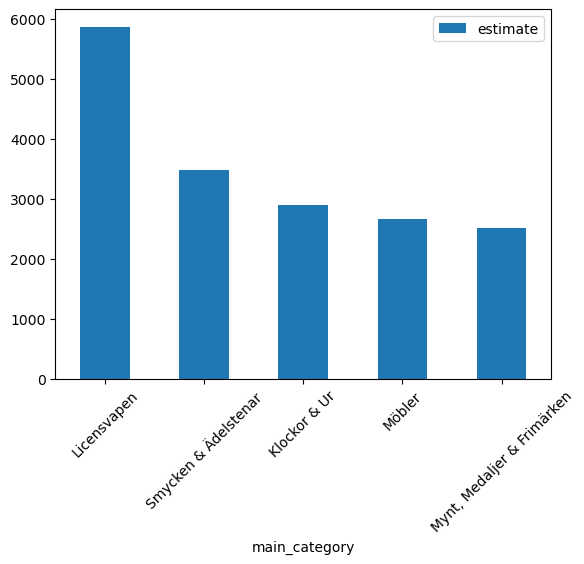

In [102]:
highest_estimate_means.plot(kind = "bar", rot=45)

<h3>Highest estimate items per category</h3>

In [103]:
auctions_grouping.groupby(["main_category"]).max().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Klockor & Ur,620000.0
Smycken & Ädelstenar,579515.0
Möbler,347709.0
Belysning & Lampor,289758.0
Glas,254987.0
"Böcker, Kartor & Handskrifter",225000.0
"Mynt, Medaljer & Frimärken",200000.0
Licensvapen,180000.0
Vapen & Militaria,160000.0


In [104]:
auctions_grouping.groupby(["main_category"]).idxmax().sort_values(by="estimate")

,estimate
main_category,
Möbler,34208
Leksaker,84006
Mattor & Textil,88092
Glas,99336
Keramik & Porslin,149311
Vapen & Militaria,253155
Licensvapen,290904
Klockor & Ur,295784
Allmoge,327053


In [105]:
auctions.loc[99336]

url                                       https://auctionet.com/sv/2058053-pino-castagna...
id                                                                                2058053.0
auction_id                                                                        3691370.0
currency                                                                                SEK
reserve_met                                                                            True
estimate                                                                           254987.0
upper_estimate                                                                          NaN
next_bid_amount                                                                     66065.0
state                                                                                  sold
hammered                                                                              False
processed                                                                       

<h3>Summary</h3>

the top five max estimated-value items per category are

* Klockor & Ur 	620,000 link: https://auctionet.com/sv/3070131-patek-philippe-armbandsur-aquanaut-2009
* Smycken & Ädelstenar 	579,515 link: https://auctionet.com/sv/3128070-armband-tva-briljantslipade-diamanter-totalt-ca-5-00-ct-platina
* Möbler 	347,709 link: https://auctionet.com/sv/3172253-marilyn-monroe-soffa-fran-marilyn-monroes-personliga-egendom
* Belysning & Lampor 	289,758 link: https://auctionet.com/sv/2236733-ljuskrona-for-tolv-ljus-johann-fischer-st-petersburg-1801
* Glas 	254,987 link: https://auctionet.com/sv/2058053-pino-castagna-bambu-murano-berengo-studio-glasskulptur

<h3>Taking a look at conditions</h3>

In [106]:
conditions = auctions_no_error['condition'].unique()

In [107]:
len(conditions)

242435

<h3>Summary</h3>

It seems that conditions are user-input and not standardized

<h2>Primary Conclusions</h2>

These are the primary findings on Auctions file

* Filtering on the (weapon license = true) leads us to finding the highest-valued weapon sold The value was estiamted at 180,000 SEK & it sold for 212,868 SEK https://auctionet.com/sv/3793589-dubbelstudsare-fabrikat-krieghoff-modell-classic-big-five-de-lux-kaliber-470-nitro
* It seems there's a pattern with these auction items that are missing currency value. they also miss the same number of other columns, so I assume that filling these columns is not mandatory for listings. So the essential columns for listing seem to be: url, title, description, condition, main category, sub category
* For all categories, the average is consistently & noticeably higher than the median
* The top five max estimated-value items per category are

    * Klockor & Ur 	620,000 link: https://auctionet.com/sv/3070131-patek-philippe-armbandsur-aquanaut-2009
    * Smycken & Ädelstenar 	579,515 link: https://auctionet.com/sv/3128070-armband-tva-briljantslipade-diamanter-totalt-ca-5-00-ct-platina
    * Möbler 	347,709 link: https://auctionet.com/sv/3172253-marilyn-monroe-soffa-fran-marilyn-monroes-personliga-egendom
    * Belysning & Lampor 	289,758 link: https://auctionet.com/sv/2236733-ljuskrona-for-tolv-ljus-johann-fischer-st-petersburg-1801
    * Glas 	254,987 link: https://auctionet.com/sv/2058053-pino-castagna-bambu-murano-berengo-studio-glasskulptur
 
* Item conditions are user-input and not standardized

<h2>Exploring bids</h2>

<h3>Data loading and pre-processing</h3>

In [108]:
bids = pd.read_csv('bids.csv')

In [111]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974622 entries, 0 to 4974621
Data columns (total 10 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   auction_id                                int64  
 1   id                                        int64  
 2   bidder                                    int64  
 3   amount                                    int64  
 4   reserve_met                               bool   
 5   first_to_meet_non_minimum_reserve_amount  float64
 6   auto                                      bool   
 7   time_string_short                         object 
 8   time_string_long                          object 
 9   max_bid_time_string                       object 
dtypes: bool(2), float64(1), int64(4), object(3)
memory usage: 313.1+ MB


In [110]:
bids.head(3)

,auction_id,id,bidder,amount,reserve_met,first_to_meet_non_minimum_reserve_amount,auto,time_string_short,time_string_long,max_bid_time_string
0,3412895,26747481,8,951,True,NaN,False,"24 apr, 17:12",24 apr 2024 kl. 17:12:30 CEST,"24 apr 2024, 17:12"
1,3412895,26747475,9,901,True,NaN,False,"24 apr, 17:11",24 apr 2024 kl. 17:11:59 CEST,"24 apr 2024, 17:11"
2,3412895,26747465,8,851,True,NaN,False,"24 apr, 17:11",24 apr 2024 kl. 17:11:17 CEST,"24 apr 2024, 17:11"


<h3>Exploratory Data Analysis</h3>

<h4>Most bid item</h4>

In [116]:
# I'm interested in looking at which item has had the most bids on it

In [115]:
bids.groupby("auction_id").size().sort_values(ascending = False)

auction_id
3699370    257
3444256    199
3479777    122
3549937    116
3392189    115
          ... 
3590001      1
2785119      1
2785108      1
3590022      1
3176876      1
Length: 559683, dtype: int64

In [117]:
# let's quickly check if these bids were / or seem valid

In [118]:
bids.loc[bids["auction_id"] == 3699370]

,auction_id,id,bidder,amount,reserve_met,first_to_meet_non_minimum_reserve_amount,auto,time_string_short,time_string_long,max_bid_time_string
1747078,3699370,28647948,8,1001599,True,NaN,False,"29 aug, 14:05",29 aug 2024 kl. 14:05:26 CEST,"29 aug 2024, 14:05"
1747079,3699370,28647947,12,991602,True,NaN,True,"29 aug, 14:05",29 aug 2024 kl. 14:05:26 CEST,"29 aug 2024, 14:05"
1747080,3699370,28647938,12,991599,True,NaN,False,"29 aug, 14:05",29 aug 2024 kl. 14:05:04 CEST,"29 aug 2024, 14:05"
1747081,3699370,28647927,8,981599,True,NaN,False,"29 aug, 14:04",29 aug 2024 kl. 14:04:38 CEST,"29 aug 2024, 14:04"
1747082,3699370,28647926,12,971606,True,NaN,True,"29 aug, 14:04",29 aug 2024 kl. 14:04:38 CEST,"29 aug 2024, 14:04"
...,...,...,...,...,...,...,...,...,...,...
1747330,3699370,28495263,1,1278,False,NaN,False,"19 aug, 22:40",19 aug 2024 kl. 22:40:02 CEST,"19 aug 2024, 22:40"
1747331,3699370,28491741,4,472,False,NaN,False,"19 aug, 19:43",19 aug 2024 kl. 19:43:56 CEST,"19 aug 2024, 19:43"
1747332,3699370,28491276,3,419,False,NaN,False,"19 aug, 19:17",19 aug 2024 kl. 19:17:37 CEST,"19 aug 2024, 19:17"
1747333,3699370,28491172,2,369,False,NaN,False,"19 aug, 19:09",19 aug 2024 kl. 19:09:15 CEST,"19 aug 2024, 19:09"


In [119]:
# looks good. Let's see what the item was

In [120]:
auctions.loc[auctions["id" == 3699370]]

KeyError: False

In [ ]:
# it seems the item is not avilable on the auctions file. maybe it has been removed from te website entirely

In [168]:
# later comment - I see I made a syntax error, I initially thought that the Key Error returning False means that my query
#was not found anywhere on the auctions Dataframe

<h4>Summary</h4>

the most bid item is not avilable on the auctions file. maybe it has been removed from the website entirely
It's ID is 3699370

<h4>top 10 most bid items</h4>

In [144]:
top_ten = bids.groupby("auction_id").size().sort_values(ascending = False).head(10)

In [152]:
top_ten.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 3699370 to 1254170
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 460.0 bytes


In [153]:
top_ten

auction_id
3699370    257
3444256    199
3479777    122
3549937    116
3392189    115
2175609    108
3482216    107
3204774    107
3499911    106
1254170    104
dtype: int64

In [155]:
type(top_ten)

pandas.core.series.Series

In [157]:
top_ten.index

Index([3699370, 3444256, 3479777, 3549937, 3392189, 2175609, 3482216, 3204774,
       3499911, 1254170],
      dtype='int64', name='auction_id')

In [163]:
id_list = list(top_ten.index)

In [164]:
type(id_list)

list

In [166]:
auctions.loc[auctions['id'].isin(id_list)]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
111466,https://auctionet.com/sv/2175609-karta-exacta-...,2175609.0,3808752.0,SEK,True,10000.0,NaN,479806.0,sold,False,True,True,1.654969e+09,11 jun 2022 kl. 19:30 CEST,lör 11 jun,lör 11 jun kl. 19:30 CEST,False,True,False,NaN,NaN,NaN,0.0,"2175609. KARTA,Exacta totius Africa tabula,Nic...",175x140 cm.Schematisk topografi. - Orter utsat...,Slitage samt skador.,Södermanlands Auktionsverk,1.0,"Böcker, Kartor & Handskrifter",Kartor,NaN,NaN,NaN,NaN
129723,https://auctionet.com/sv/3549937-mynt-2-st-kin...,3549937.0,6308153.0,SEK,True,600.0,NaN,93000.0,sold,False,True,True,1.723391e+09,11 aug 2024 kl. 17:38 CEST,sön 11 aug,sön 11 aug kl. 17:38 CEST,False,True,False,NaN,NaN,NaN,0.0,"3549937. MYNT, 2 st, Kina, 1903/1914.","Diametrar 39 och 40 mm.7 mace 2 candareens, 19...",Bruksslitage.,Växjö Auktionskammare,2.0,"Mynt, Medaljer & Frimärken",Mynt,NaN,NaN,NaN,NaN
200287,https://auctionet.com/sv/3479777-vas-porslin-k...,3479777.0,6179743.0,SEK,True,4000.0,NaN,110024.0,sold,False,True,True,1.718383e+09,14 jun 2024 kl. 18:34 CEST,fre 14 jun,fre 14 jun kl. 18:34 CEST,False,True,False,NaN,NaN,NaN,0.0,"3479777. VAS, porslin, Kina, troligen sen Qing...",Balusterformad vas med turkost glaserad insida...,Ytslitage. Spricka vid vasens mynning. Nagg lä...,Karlstad Hammarö Auktionsverk,1.0,NaN,NaN,NaN,NaN,NaN,NaN
202865,https://auctionet.com/sv/3699370-kong-vas-pors...,3699370.0,6589469.0,SEK,True,5000.0,NaN,1026599.0,sold,False,True,True,1.724933e+09,29 aug 2024 kl. 14:07 CEST,tor 29 aug,tor 29 aug kl. 14:07 CEST,False,True,False,NaN,NaN,NaN,0.0,"3699370. KONG-VAS. Porslin med hänklar, polykr...",Höjd 30 cm.,"Tllverkningsdefekter, slitage och glasyrmistor.",Skånes Auktionsverk,12.0,Keramik & Porslin,Orientaliskt,NaN,NaN,NaN,NaN
285838,https://auctionet.com/sv/3499911-tekanna-porsl...,3499911.0,6214119.0,SEK,True,4000.0,NaN,42109.0,sold,False,True,True,1.715600e+09,13 maj 2024 kl. 13:32 CEST,mån 13 maj,mån 13 maj kl. 13:32 CEST,False,True,False,NaN,NaN,NaN,0.0,"3499911. TEKANNA, porslin, Kina, 1800-tal.",Rektangulär form med dekor av fågel på prunusk...,Slitage.,Auktionshuset Kolonn,800.0,NaN,NaN,NaN,NaN,NaN,NaN
290378,https://auctionet.com/sv/3444256-vas-porslin-s...,3444256.0,6120756.0,SEK,True,1500.0,NaN,512382.0,sold,False,True,True,1.715604e+09,13 maj 2024 kl. 14:37 CEST,mån 13 maj,mån 13 maj kl. 14:37 CEST,False,True,False,NaN,NaN,NaN,0.0,"3444256. VAS, porslin, sen Qing, Kina tidigt 1...","Kvadratisk vas med elefantformade hänklar, dek...","Slitage, ett större nagg, ett par mindre.",Auktionshuset Kolonn,3.0,NaN,NaN,NaN,NaN,NaN,NaN
350615,https://auctionet.com/sv/3482216-platleksak-mo...,3482216.0,6184575.0,SEK,True,12000.0,NaN,90276.0,sold,False,True,True,1.715027e+09,6 maj 2024 kl. 22:24 CEST,mån 6 maj,mån 6 maj kl. 22:24 CEST,False,True,False,NaN,NaN,NaN,0.0,"3482216. PLÅTLEKSAK, motorcyklist, Tipp & Co, ...","Man på motorcykel, 950 x 150. Urverk.Längd ca ...","Bruksslitage, repor, märken. Ej funktionstesta...",Hälsinglands Auktionsverk,3.0,Leksaker,Leksaker,NaN,NaN,NaN,NaN
495088,https://auctionet.com/sv/1254170-nordsjons-mon...,1254170.0,2244664.0,SEK,True,200000.0,NaN,165011.0,sold,False,True,True,1.579024e+09,14 jan 2020 kl. 18:54 CET,tis 14 jan,tis 14 jan kl. 18:54 CET,False,True,False,NaN,NaN,NaN,0.0,"1254170. Nordsjöns monarker 18 k guld 483 g, n...",Nordsjöns monarker i 18 k guld.,Inga anmärkningar.,Laholms Auktionskammare,6.0,"Mynt, Medaljer & Frimärken",Ordnar & Medaljer,NaN,NaN,NaN,NaN
508689,https://auctionet.com/sv/3204774-figurin-agat-...,3204774.0,5690023.0,SEK,True,1500.0,NaN,54750.0

In [169]:
# the top 10 most bid-on items are not necessarily belonging to any category. there are at least 4 porcelain objects however

<h4>Summary</h4>

there's no particular category thats standing out in the most bid on items. But by looking at the titles, it seems that 4 out of 10 are porcelain objects

incidentally, we've found the missing item from the exercise above, it is a beautful piece of Chinaware https://auctionet.com/sv/3699370-kong-vas-porslin-med-hanklar-polykrom-dekor-samt-kalligrafi-kina-ca-1920

<h4>lowest bid</h4>

In [121]:
# let's see which item had the lowest amount bid on it

In [122]:
bids["amount"].min()

200

In [123]:
bids["amount"].idxmin()

151

In [124]:
bids.loc[151]

auction_id                                                        2953599
id                                                               22341249
bidder                                                                  1
amount                                                                200
reserve_met                                                          True
first_to_meet_non_minimum_reserve_amount                              NaN
auto                                                                False
time_string_short                                           20 jul, 11:51
time_string_long                            20 jul 2023 kl. 11:51:57 CEST
max_bid_time_string                                    20 jul 2023, 11:51
Name: 151, dtype: object

In [125]:
# let's see what that item ended up selling for

In [126]:
bids.loc[bids["auction_id"] == 2953599]

,auction_id,id,bidder,amount,reserve_met,first_to_meet_non_minimum_reserve_amount,auto,time_string_short,time_string_long,max_bid_time_string
129,2953599,22413324,3,1350,True,NaN,True,"27 jul, 16:06",27 jul 2023 kl. 16:06:14 CEST,"27 jul 2023, 15:37"
130,2953599,22413323,6,1250,True,NaN,False,"27 jul, 16:06",27 jul 2023 kl. 16:06:14 CEST,"27 jul 2023, 16:06"
131,2953599,22413058,3,1150,True,NaN,False,"27 jul, 15:37",27 jul 2023 kl. 15:37:32 CEST,"27 jul 2023, 15:37"
132,2953599,22413057,6,1050,True,NaN,True,"27 jul, 15:37",27 jul 2023 kl. 15:37:14 CEST,"27 jul 2023, 15:36"
133,2953599,22413056,3,1000,True,NaN,False,"27 jul, 15:37",27 jul 2023 kl. 15:37:14 CEST,"27 jul 2023, 15:37"
134,2953599,22413053,6,950,True,NaN,False,"27 jul, 15:36",27 jul 2023 kl. 15:36:48 CEST,"27 jul 2023, 15:36"
135,2953599,22412970,3,900,True,NaN,False,"27 jul, 15:29",27 jul 2023 kl. 15:29:46 CEST,"27 jul 2023, 15:29"
136,2953599,22412793,6,850,True,NaN,False,"27 jul, 15:08",27 jul 2023 kl. 15:08:45 CEST,"27 jul 2023, 15:08"
137,2953599,22412604,3,800,True,NaN,False,"27 jul, 14:49",27 jul 2023 kl. 14:49:04 CEST,"27 jul 2023, 14:49"
138,2953599,22412216,6,750,True,NaN,False,"27 jul, 14:16",27 jul 2023 kl. 14:16:11 CEST,"27 jul 2023, 14:16"


In [127]:
auctions.loc[auctions["id"] == 2953599]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
11,https://auctionet.com/sv/2953599-halvhornskniv...,2953599.0,5245599.0,SEK,True,800.0,NaN,1450.0,sold,False,True,True,1.690470e+09,27 jul 2023 kl. 17:06 CEST,tor 27 jul,tor 27 jul kl. 17:06 CEST,False,True,False,NaN,NaN,NaN,0.0,"2953599. HALVHORNSKNIV, masurbjörk, samearbete.",Längd inkl. slida ca 26 cm.,Knivens blad mörknat skick.,Södermanlands Auktionsverk,272.0,Vapen & Militaria,Blankvapen,NaN,NaN,NaN,NaN


In [128]:
# item found. let's see what that was

In [129]:
auctions.loc[11].url

'https://auctionet.com/sv/2953599-halvhornskniv-masurbjork-samearbete'

<h4>Summary</h4>

The item that has had the lowest bid is https://auctionet.com/sv/2953599-halvhornskniv-masurbjork-samearbete

It eventually sold for 1350

<h4>highest automated bid</h4>

In [ ]:
# let's find the highest automated bid amount

In [131]:
bids['auto'].unique()

array([False,  True])

In [134]:
auto_bids = bids.loc[bids['auto'] == True]

In [135]:
auto_bids['amount'].max()

1213168

In [136]:
auto_bids['amount'].idxmax()

3393432

In [ ]:
# we've found the location, let's see who the bidder was

In [138]:
bids.loc[3393432]

auction_id                                                       2127361
id                                                              16400579
bidder                                                                 7
amount                                                           1213168
reserve_met                                                         True
first_to_meet_non_minimum_reserve_amount                             NaN
auto                                                                True
time_string_short                                           4 maj, 19:37
time_string_long                            4 maj 2022 kl. 19:37:34 CEST
max_bid_time_string                                    4 maj 2022, 19:37
Name: 3393432, dtype: object

In [ ]:
# this person was the 7th bidder on the item

In [141]:
bids.loc[bids["auction_id"] == 2127361]

,auction_id,id,bidder,amount,reserve_met,first_to_meet_non_minimum_reserve_amount,auto,time_string_short,time_string_long,max_bid_time_string
3393431,2127361,16400580,6,1263163,True,NaN,False,"4 maj, 19:37",4 maj 2022 kl. 19:37:34 CEST,"4 maj 2022, 19:37"
3393432,2127361,16400579,7,1213168,True,NaN,True,"4 maj, 19:37",4 maj 2022 kl. 19:37:34 CEST,"4 maj 2022, 19:37"
3393433,2127361,16400578,7,1213160,True,NaN,False,"4 maj, 19:37",4 maj 2022 kl. 19:37:30 CEST,"4 maj 2022, 19:37"
3393434,2127361,16400570,6,1163160,True,NaN,False,"4 maj, 19:37",4 maj 2022 kl. 19:37:13 CEST,"4 maj 2022, 19:37"
3393435,2127361,16400569,7,1113160,True,NaN,True,"4 maj, 19:37",4 maj 2022 kl. 19:37:13 CEST,"4 maj 2022, 19:37"
...,...,...,...,...,...,...,...,...,...,...
3393488,2127361,16248516,3,10500,False,NaN,False,"22 apr, 23:23",22 apr 2022 kl. 23:23:44 CEST,"22 apr 2022, 23:23"
3393489,2127361,16244851,2,10000,False,NaN,False,"22 apr, 19:36",22 apr 2022 kl. 19:36:26 CEST,"22 apr 2022, 19:36"
3393490,2127361,16244845,2,400,False,NaN,False,"22 apr, 19:36",22 apr 2022 kl. 19:36:09 CEST,"22 apr 2022, 19:36"
3393491,2127361,16244817,2,350,False,NaN,False,"22 apr, 19:33",22 apr 2022 kl. 19:33:30 CEST,"22 apr 2022, 19:33"


In [ ]:
# our bidder unfortuantely did not receive the item she set an automatic bid on. she was outbid by the 6th bidder

# well let's see what the item was then

In [170]:
auctions.loc[auctions['id'] == 2127361]

,url,id,auction_id,currency,reserve_met,estimate,upper_estimate,next_bid_amount,state,hammered,processed,publicly_visible,ends_at,ends_at_string,ends_at_string_short,ends_at_string_short_with_time,license_weapon,online_auction,hammer_auction,live_bidding_event_starts_at,live_bidding_event_approximate_ends_at,location,calendar_days_left,title,description,condition,house,number_of_visits,main_category,sub_category,catalog_nr,address,placement,error
393265,https://auctionet.com/sv/2127361-shamshir-pers...,2127361.0,3728188.0,SEK,True,100000.0,NaN,1288163.0,sold,False,True,True,1.651686e+09,4 maj 2022 kl. 19:39 CEST,ons 4 maj,ons 4 maj kl. 19:39 CEST,False,True,False,NaN,NaN,NaN,0.0,"2127361. SHAMSHIR, persisk, omkring 1800.",Fågelhuvudformad kavel i 21-22 karats guld med...,"Slitage, skador, bortfall.",Stockholms Auktionsverk Magasin 5,9.0,Vapen & Militaria,Blankvapen,NaN,NaN,NaN,NaN


In [143]:
auctions.loc[auctions['id'] == 2127361].url

393265    https://auctionet.com/sv/2127361-shamshir-pers...
Name: url, dtype: object

In [ ]:
# right. I see what the big deal was..

<h4>Summary</h4>

The highest valued automatic bid was done on the 4th of May, 2022
it was set up by the 7th bidder on the item, and went up all the way to a fantastic value of 1,213,168 SEK

unfortunately, our automatic bidder was outbid still by the 6th bidder. And that was the last bid.

the item in question is indeed a fascinating find https://auctionet.com/sv/2127361-shamshir-persisk-omkring-1800

<h2>Primary Conclusions</h2>

* the item with the most number of bids placed on it is a beautiful vintage piece of Chinaware porcelain https://auctionet.com/sv/3699370-kong-vas-porslin-med-hanklar-polykrom-dekor-samt-kalligrafi-kina-ca-1920 - its ID is 3699370. It sold for 1,001,599 SEK
* there's no particular category thats standing out in the most bid-on items. But by looking at the titles, it seems that 4 out of 10 are porcelain objects
* The item that has had the lowest bid is https://auctionet.com/sv/2953599-halvhornskniv-masurbjork-samearbete - It eventually sold for 1350
* the highest automatic bid placed was up to a value of 1,213,168 SEK - on a vintage weapon (sword)

<h1>Key Findings</h1>

<h2>Executive Summary</h2>

<p>There are a few high-value items in each category, which inflate the average for each category and cause it to skew towards a higher value</p>

<h2>Key argument #1</h2>
<p>The mean for each category is considerably higher than each category's median</p>

<h3>Evidence #1</h3>


<h4>Average by category</h4>

In [171]:
auctions_grouping.groupby(["main_category"]).mean().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Licensvapen,5864.478772
Smycken & Ädelstenar,3482.706576
Klockor & Ur,2895.335486
Möbler,2653.317443
"Mynt, Medaljer & Frimärken",2508.374054
Vapen & Militaria,2450.537284
Mattor & Textil,2138.375833
"Foto, Kameror & Optik",1949.230993
Belysning & Lampor,1685.992119


<h4>Median by category</h4>

In [172]:
auctions_grouping.groupby(["main_category"]).median().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Licensvapen,3500.0
Möbler,1500.0
Smycken & Ädelstenar,1500.0
Vapen & Militaria,1500.0
Klockor & Ur,1118.0
Belysning & Lampor,1000.0
Keramik & Porslin,1000.0
Mattor & Textil,1000.0
"Mynt, Medaljer & Frimärken",1000.0


<h3>Evidence #2</h3>


The maximum value of estimated value by each category is many times higher than the average and the median for each category

In [174]:
auctions_grouping.groupby(["main_category"]).max().sort_values(by="estimate", ascending = False)

,estimate
main_category,
Klockor & Ur,620000.0
Smycken & Ädelstenar,579515.0
Möbler,347709.0
Belysning & Lampor,289758.0
Glas,254987.0
"Böcker, Kartor & Handskrifter",225000.0
"Mynt, Medaljer & Frimärken",200000.0
Licensvapen,180000.0
Vapen & Militaria,160000.0
